In [121]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd



In [122]:
ger =  pd.read_csv('germancredit.csv')

In [123]:
ger.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

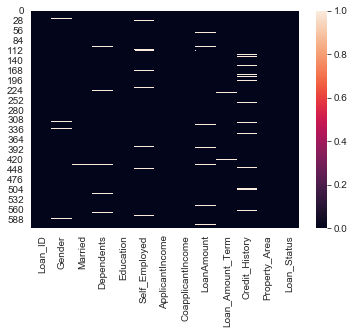

In [124]:
 sb.heatmap(ger.isnull())

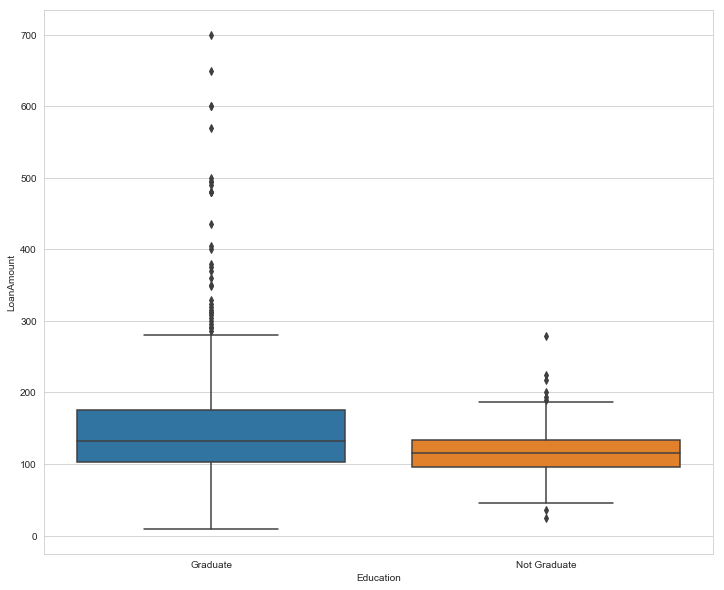

In [90]:
plt.figure(figsize=(12,10))

sb.boxplot(x='Education',y='LoanAmount',data=ger)
 


In [125]:
sb.set_style('whitegrid')

In [126]:
def mapping(cols):
    LoanAmount = cols[0]
    Education = cols[1]
    
    if pd.isnull(LoanAmount):
        
        if Education =='Graduate':
            return 140
        elif Education == 'Not Graduate':
            return 120
    
    else:
        return LoanAmount
    

In [127]:
ger['LoanAmount'] =  ger[['LoanAmount','Education']].apply(mapping,axis = 1)

In [108]:
ger.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Graduate,5849,0.0,140.0,360.0,1.0,Urban,Y
1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y


In [129]:
 Married = pd.get_dummies(ger['Married'],drop_first=True)
Education = pd.get_dummies(ger['Education'],drop_first=True)
Property_Area = pd.get_dummies(ger['Property_Area'],drop_first=True)
Loan_Status = pd.get_dummies(ger['Loan_Status'],drop_first=True)

In [130]:
ger.drop(['Married','Education','Property_Area','Loan_Status','Loan_ID','Gender'],axis=1,inplace=True)

In [132]:
 ger= pd.concat([ger,Married,Education,Property_Area,Loan_Status],axis=1)

In [133]:
 ger.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Not Graduate,Semiurban,Urban,Y
0,0,No,5849,0.0,140.0,360.0,1.0,0,0,0,1,1
1,1,No,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1
3,0,No,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,0,0,0,1,1


KeyError: "['Loan_ID' 'Gender' 'Married' 'Self_Employed'] not found in axis"

In [143]:
ger.drop(('Self_Employed'),axis=1,inplace=True)

In [144]:
 
ger.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Not Graduate,Semiurban,Urban,Y
0,5849,0.0,140.0,360.0,1.0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,1


In [142]:
ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Yes                  614 non-null uint8
Not Graduate         614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
Y                    614 non-null uint8
dtypes: float64(4), int64(1), object(1), uint8(5)
memory usage: 31.9+ KB


In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()

In [191]:
scaler.fit(ger.drop('Y',axis=1))

C:\Users\SAM\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [192]:
scaled_features= scaler.transform(ger.drop('Y',axis=1))

C:\Users\SAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [193]:
df_feat= pd.DataFrame(scaled_features,columns=ger.columns[:-1])

In [194]:
df_feat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Yes,Not Graduate,Semiurban,Urban
0,0.072991,-0.554487,-0.070868,-1.357421,-0.528362,-0.782016,1.428147
1,-0.134412,-0.038732,-0.213689,0.736691,-0.528362,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.951599,0.736691,-0.528362,-0.782016,1.428147
3,-0.462062,0.251980,-0.308903,0.736691,1.892641,-0.782016,1.428147
4,0.097728,-0.554487,-0.058966,-1.357421,-0.528362,-0.782016,1.428147


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,ger['Y'],
                                                    test_size=0.30)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier(n_neighbors=1)

In [199]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

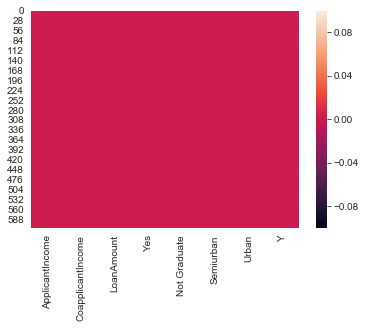

In [188]:
sb.heatmap(ger.isnull())

In [200]:
 pred = knn.predict(X_test)

In [201]:
from sklearn.metrics import classification_report,confusion_matrix

In [202]:
print(confusion_matrix(y_test,pred))

[[23 34]
 [40 88]]


In [203]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.37      0.40      0.38        57
           1       0.72      0.69      0.70       128

   micro avg       0.60      0.60      0.60       185
   macro avg       0.54      0.55      0.54       185
weighted avg       0.61      0.60      0.61       185



In [204]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

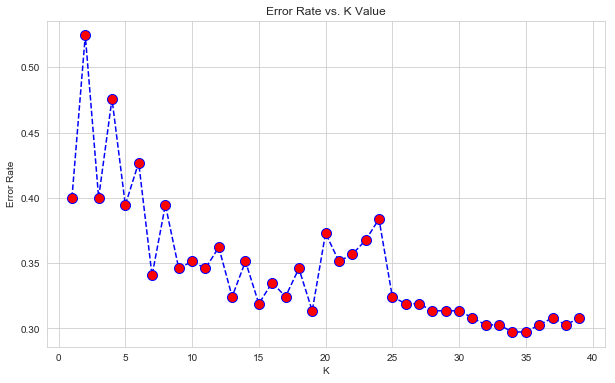

In [205]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [215]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[  4  53]
 [  2 126]]


              precision    recall  f1-score   support

           0       0.67      0.07      0.13        57
           1       0.70      0.98      0.82       128

   micro avg       0.70      0.70      0.70       185
   macro avg       0.69      0.53      0.47       185
weighted avg       0.69      0.70      0.61       185

